In [12]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid', {'legend.frameon':True})
%matplotlib inline


dataset = 'bank'
#dataset = 'census'
#dataset = 'diabetes'


###### unfair #######
file = 'results/'+dataset+'/Cost_full.pkl'
pkl_file = open(file, 'rb')
Cost_full =pickle.load(pkl_file)
pkl_file.close()
file = 'results/'+dataset+'/Balance_full.pkl'
pkl_file = open(file, 'rb')
Balance_full =pickle.load(pkl_file)
pkl_file.close()
file = 'results/'+dataset+'/Entropy_full.pkl'
pkl_file = open(file, 'rb')
Entropy_full =pickle.load(pkl_file)
pkl_file.close()

###### Fair MWD MCF #####
divide_factor = 500 # for getting the average likelihood pr observation of the decomposition 
file = 'results/'+dataset+'/Cost_mcf.pkl'
pkl_file = open(file, 'rb')
Cost_mcf =pickle.load(pkl_file)
pkl_file.close()
file = 'results/'+dataset+'/Balance_mcf.pkl'
pkl_file = open(file, 'rb')
Balance_mcf =pickle.load(pkl_file)
pkl_file.close()
file = 'results/'+dataset+'/Entropy_mcf.pkl'
pkl_file = open(file, 'rb')
Entropy_mcf =pickle.load(pkl_file)
pkl_file.close()
file = 'results/'+dataset+'/Decomp_mcf.pkl'
pkl_file = open(file, 'rb')
Decomp_mcf =pickle.load(pkl_file)
pkl_file.close()
file = 'results/'+dataset+'/Like_mcf.pkl'
pkl_file = open(file, 'rb')
Like_mcf =pickle.load(pkl_file)/divide_factor
pkl_file.close()


###### Fair Kmedian #####
file = 'results/'+dataset+'/Cost_kmedian.pkl'
pkl_file = open(file, 'rb')
Cost_kmedian =pickle.load(pkl_file)
pkl_file.close()
file = 'results/'+dataset+'/Balance_kmedian.pkl'
pkl_file = open(file, 'rb')
Balance_kmedian =pickle.load(pkl_file)
pkl_file.close()
file = 'results/'+dataset+'/Entropy_kmedian.pkl'
pkl_file = open(file, 'rb')
Entropy_kmedian =pickle.load(pkl_file)
pkl_file.close()
file = 'results/'+dataset+'/Decomp_kmedian.pkl'
pkl_file = open(file, 'rb')
Decomp_kmedian =pickle.load(pkl_file)
pkl_file.close()
file = 'results/'+dataset+'/Like_kmedian.pkl'
pkl_file = open(file, 'rb')
Like_kmedian =pickle.load(pkl_file)/divide_factor
pkl_file.close()

# Convert to standard errors
Cost_full[:,1] = Cost_full[:,1]/np.sqrt(5) 
Cost_mcf[:,1] = Cost_mcf[:,1]/np.sqrt(5) 
Cost_kmedian[:,1] = Cost_kmedian[:,1]/np.sqrt(5) 
Balance_full[:,1] = Balance_full[:,1]/np.sqrt(5) 
Balance_mcf[:,1] = Balance_mcf[:,1]/np.sqrt(5)  
Balance_kmedian[:,1] = Balance_kmedian[:,1]/np.sqrt(5) 
Entropy_full[:,1] = Entropy_full[:,1]/np.sqrt(5) 
Entropy_mcf[:,1] = Entropy_mcf[:,1]/np.sqrt(5)  
Entropy_kmedian[:,1] = Entropy_kmedian[:,1]/np.sqrt(5) 
Decomp_kmedian[:,1] = Decomp_kmedian[:,1]/np.sqrt(5) 
Decomp_mcf[:,1] = Decomp_mcf[:,1]/np.sqrt(5) 
Like_kmedian[:,1] = Like_kmedian[:,1]/np.sqrt(5) 
Like_mcf[:,1] = Like_mcf[:,1]/np.sqrt(5) 

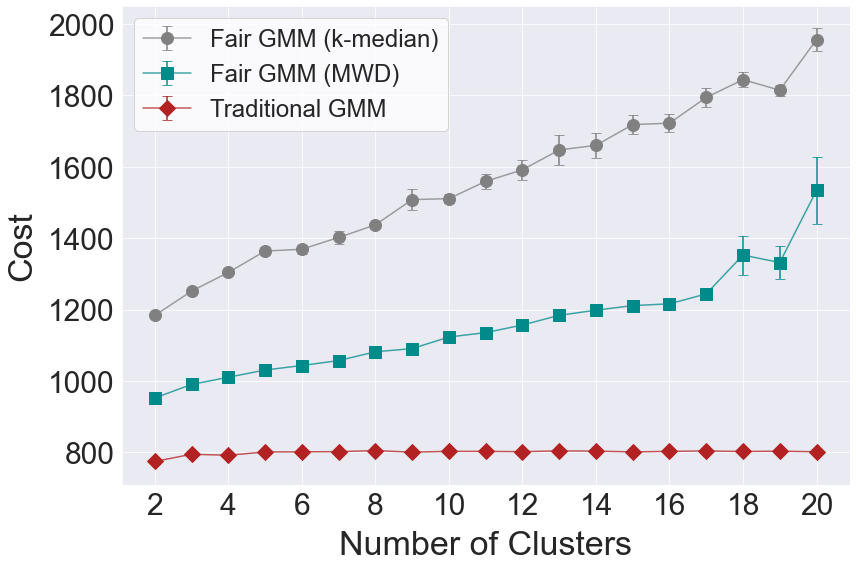

In [13]:
n_components= 20
linewidth = 1.5
linewidth_cap=2
capsize = 5
markersize = 12
marker1 = 'o'
marker2 = 'D'
marker3 = 's'

fontsize = 30
plt.figure(figsize=(12,8))

kmedian_col = 'grey'
fair_col = 'darkcyan'

lin_kmedian  = plt.errorbar(np.arange(2,n_components+1),Cost_kmedian[:n_components-1,0],linestyle='-',label='Kmedian Decomposition',color=kmedian_col,alpha=0.75,linewidth=linewidth)
mark_kmedian = plt.errorbar(np.arange(2,n_components+1),Cost_kmedian[:n_components-1,0],linestyle='',marker=marker1,markersize=markersize,label='Kmedian Decomposition',color=kmedian_col,alpha=1)
err_kmedian = plt.errorbar(np.arange(2,n_components+1),Cost_kmedian[:n_components-1,0],yerr=Cost_kmedian[:n_components-1,1],capsize=capsize,linestyle='',marker='',label='Kmedian Decomposition',color=kmedian_col,alpha=0.75,linewidth=linewidth_cap)

lin_unfair  = plt.errorbar(np.arange(2,n_components+1),Cost_full[:n_components-1,0],linestyle='-',label='GMM Fair',color='firebrick',alpha=0.75,linewidth=linewidth)
mark_unfair = plt.errorbar(np.arange(2,n_components+1),Cost_full[:n_components-1,0],linestyle='',marker=marker2,markersize=markersize,label='GMM Fair',color='firebrick',alpha=1)
err_unfair = plt.errorbar(np.arange(2,n_components+1),Cost_full[:n_components-1,0],yerr=Cost_full[:n_components-1,1],capsize=capsize,linestyle='',marker='',label='GMM Fair',color='firebrick',alpha=0.75,linewidth=linewidth_cap)

lin_fair  = plt.errorbar(np.arange(2,n_components+1),Cost_mcf[:n_components-1,0],linestyle='-',label='GMM Fair',color=fair_col,alpha=0.75,linewidth=linewidth)
mark_fair = plt.errorbar(np.arange(2,n_components+1),Cost_mcf[:n_components-1,0],linestyle='',marker=marker3,markersize=markersize,label='GMM Fair',color=fair_col,alpha=1)
err_fair = plt.errorbar(np.arange(2,n_components+1),Cost_mcf[:n_components-1,0],yerr=Cost_mcf[:n_components-1,1],capsize=capsize,linestyle='',marker='',label='GMM Fair',color=fair_col,alpha=0.75,linewidth=linewidth_cap)


loc = 'upper left'
#loc = 'lower left'
plt.legend([(lin_kmedian, mark_kmedian,err_kmedian),(lin_fair, mark_fair,err_fair),(lin_unfair, mark_unfair,err_unfair)], ['Fair GMM (k-median)','Fair GMM (MWD)','Traditional GMM'],fontsize=fontsize-6,loc=loc,facecolor='white')
plt.xlabel('Number of Clusters',fontsize=fontsize+4,labelpad=10)
plt.ylabel('Cost',fontsize=fontsize+4,labelpad=10)
plt.xticks(fontsize=fontsize);
plt.yticks(fontsize=fontsize);
x = np.arange(2,n_components+1)
plt.xticks(np.arange(min(x), max(x)+1, 2.0));
plt.tight_layout()

#plt.savefig('figs/Diabetes_cost.pdf')
#plt.savefig('figs/Census_cost.pdf')
#plt.savefig('figs/Bank_cost_likelihood.pdf')

# Balance

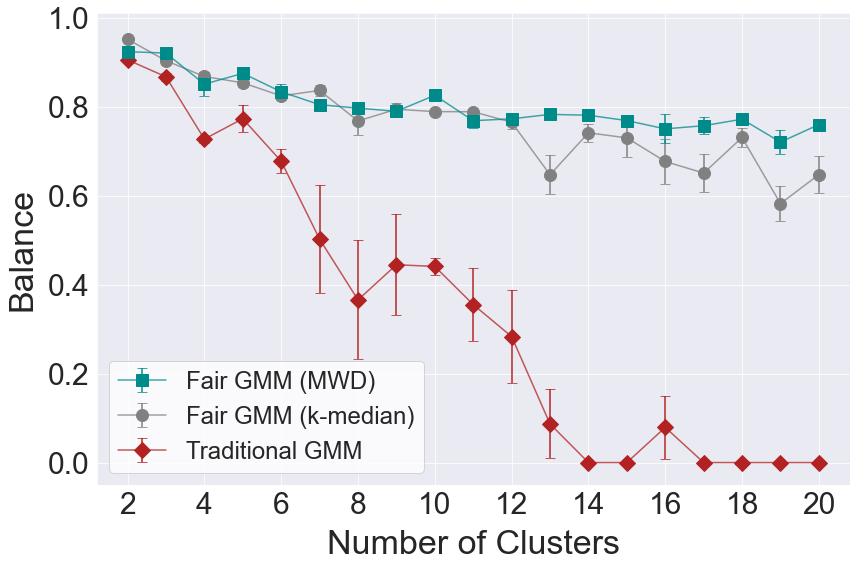

In [14]:
n_components=20 
linewidth = 1.5
linewidth_cap=2
capsize = 5


marker1 = 'o'
marker2 = 'D'
marker3 = 's'

fontsize = 30
plt.figure(figsize=(12,8))
alpha = 0.75

lin_kmedian  = plt.errorbar(np.arange(2,n_components+1),Balance_kmedian[:n_components-1,0],linestyle='-',label='Kmedian Decomposition',color=kmedian_col,alpha=0.75,linewidth=linewidth)
mark_kmedian = plt.errorbar(np.arange(2,n_components+1),Balance_kmedian[:n_components-1,0],linestyle='',marker=marker1,markersize=markersize,label='Kmedian Decomposition',color=kmedian_col,alpha=1)
err_kmedian = plt.errorbar(np.arange(2,n_components+1),Balance_kmedian[:n_components-1,0],yerr=Balance_kmedian[:n_components-1,1],capsize=capsize,linestyle='',marker='',label='Kmedian Decomposition',color=kmedian_col,alpha=0.75,linewidth=linewidth_cap)

lin_unfair  = plt.errorbar(np.arange(2,n_components+1),Balance_full[:n_components-1,0],linestyle='-',label='GMM Fair',color='firebrick',alpha=0.75,linewidth=linewidth)
mark_unfair = plt.errorbar(np.arange(2,n_components+1),Balance_full[:n_components-1,0],linestyle='',marker=marker2,markersize=markersize,label='GMM Fair',color='firebrick',alpha=1)
err_unfair = plt.errorbar(np.arange(2,n_components+1),Balance_full[:n_components-1,0],yerr=Balance_full[:n_components-1,1],capsize=capsize,linestyle='',marker='',label='GMM Fair',color='firebrick',alpha=0.75,linewidth=linewidth_cap)

lin_fair  = plt.errorbar(np.arange(2,n_components+1),Balance_mcf[:n_components-1,0],linestyle='-',label='GMM Fair',color='darkcyan',alpha=0.75,linewidth=linewidth)
mark_fair = plt.errorbar(np.arange(2,n_components+1),Balance_mcf[:n_components-1,0],linestyle='',marker=marker3,markersize=markersize,label='GMM Fair',color='darkcyan',alpha=1)
err_fair = plt.errorbar(np.arange(2,n_components+1),Balance_mcf[:n_components-1,0],yerr=Balance_mcf[:n_components-1,1],capsize=capsize,linestyle='',marker='',label='GMM Fair',color='darkcyan',alpha=0.75,linewidth=linewidth_cap)

plt.legend([(lin_fair, mark_fair,err_fair),(lin_kmedian, mark_kmedian,err_kmedian),(lin_unfair, mark_unfair,err_unfair)], ['Fair GMM (MWD)','Fair GMM (k-median)','Traditional GMM'],fontsize=fontsize-6,loc='best',facecolor='white')

plt.xlabel('Number of Clusters',fontsize=fontsize+4,labelpad=10)
plt.ylabel('Balance',fontsize=fontsize+4,labelpad=10)
plt.xticks(fontsize=fontsize);
plt.yticks(fontsize=fontsize);

x = np.arange(2,n_components+1)
plt.xticks(np.arange(min(x), max(x)+1, 2.0));

plt.axis([1.2,n_components+0.8,-0.05,1.01])
ax = plt.gca()
ax.tick_params(width=3)
plt.tight_layout()
#plt.savefig('figs/Diabetes_balance.pdf')
#plt.savefig('figs/Census_balance.pdf')
#plt.savefig('figs/Bank_balance.pdf')

# Entropy

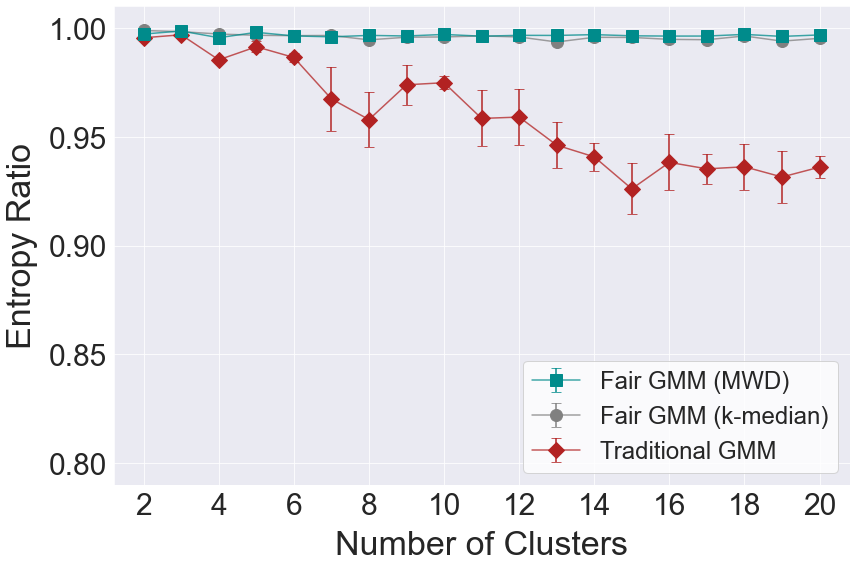

In [15]:
fontsize = 30
n_components= 20 

linewidth = 1.5
linewidth_cap=2
capsize = 5
marker1 = 'o'
marker2 = 'D'
marker3 = 's'

plt.figure(figsize=(12,8))
lin_kmedian  = plt.errorbar(np.arange(2,n_components+1),Entropy_kmedian[:n_components-1,0],linestyle='-',label='Kmedian',color='grey',alpha=0.75,linewidth=linewidth)
mark_kmedian = plt.errorbar(np.arange(2,n_components+1),Entropy_kmedian[:n_components-1,0],linestyle='',marker=marker1,markersize=markersize,label='Kmedian',color='grey',alpha=1)
err_kmedian = plt.errorbar(np.arange(2,n_components+1),Entropy_kmedian[:n_components-1,0],yerr=Entropy_kmedian[:n_components-1,1],capsize=capsize,linestyle='',marker='',label='Kmedian',color='grey',alpha=0.75,linewidth=linewidth_cap)

lin_unfair  = plt.errorbar(np.arange(2,n_components+1),Entropy_full[:n_components-1,0],linestyle='-',label='GMM Fair',color='firebrick',alpha=0.75,linewidth=linewidth)
mark_unfair = plt.errorbar(np.arange(2,n_components+1),Entropy_full[:n_components-1,0],linestyle='',marker=marker2,markersize=markersize,label='GMM Fair',color='firebrick',alpha=1)
err_unfair = plt.errorbar(np.arange(2,n_components+1),Entropy_full[:n_components-1,0],yerr=Entropy_full[:n_components-1,1],capsize=capsize,linestyle='',marker='',label='GMM Fair',color='firebrick',alpha=0.75,linewidth=linewidth_cap)

lin_fair  = plt.errorbar(np.arange(2,n_components+1),Entropy_mcf[:n_components-1,0],linestyle='-',label='GMM Fair',color='darkcyan',alpha=0.75,linewidth=linewidth)
mark_fair = plt.errorbar(np.arange(2,n_components+1),Entropy_mcf[:n_components-1,0],linestyle='',marker=marker3,markersize=markersize,label='GMM Fair',color='darkcyan',alpha=1)
err_fair = plt.errorbar(np.arange(2,n_components+1),Entropy_mcf[:n_components-1,0],yerr=Entropy_mcf[:n_components-1,1],capsize=capsize,linestyle='',marker='',label='GMM Fair',color='darkcyan',alpha=0.75,linewidth=linewidth_cap)

plt.legend([(lin_fair, mark_fair,err_fair),(lin_kmedian, mark_kmedian,err_kmedian),(lin_unfair, mark_unfair,err_unfair)], ['Fair GMM (MWD)','Fair GMM (k-median)','Traditional GMM'],fontsize=fontsize-6,loc='lower right',facecolor='white')
plt.xlabel('Number of Clusters',fontsize=fontsize+4,labelpad=10)
plt.ylabel('Entropy Ratio',fontsize=fontsize+4,labelpad=10)
plt.xticks(fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.axis([1.2,n_components+0.8,0.79,1.01])
x = np.arange(2,n_components+1)
plt.xticks(np.arange(min(x), max(x)+1, 2.0));
y = np.arange(0.8,1.01,0.05)
plt.yticks(np.arange(min(y), max(y), 0.05));
ax = plt.gca()
ax.tick_params(width=3)
plt.tight_layout()
#plt.savefig('figs/Diabetes_entropy.pdf')
#plt.savefig('figs/Census_entropy.pdf')
#plt.savefig('figs/Bank_entropy.pdf')

# Decomposition Likelihood

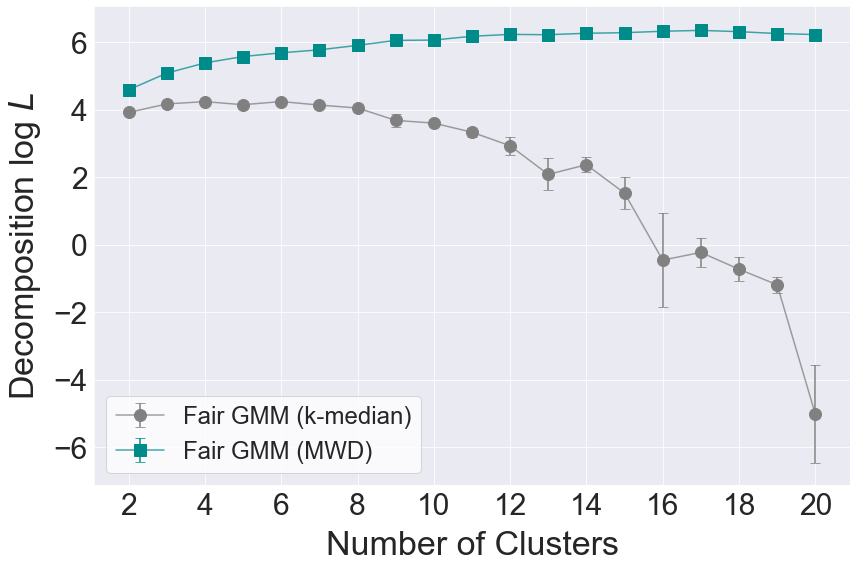

In [16]:
n_components= 20
linewidth = 1.5
linewidth_cap=2
capsize = 5
markersize = 12
marker1 = 'o'
marker2 = 'D'
marker3 = 's'

fontsize = 30
plt.figure(figsize=(12,8))

kmedian_col = 'grey'
fair_col = 'darkcyan'

lin_kmedian  = plt.errorbar(np.arange(2,n_components+1),Like_kmedian[:n_components-1,0],linestyle='-',label='Kmedian Decomposition',color=kmedian_col,alpha=0.75,linewidth=linewidth)
mark_kmedian = plt.errorbar(np.arange(2,n_components+1),Like_kmedian[:n_components-1,0],linestyle='',marker=marker1,markersize=markersize,label='Kmedian Decomposition',color=kmedian_col,alpha=1)
err_kmedian = plt.errorbar(np.arange(2,n_components+1),Like_kmedian[:n_components-1,0],yerr=Like_kmedian[:n_components-1,1],capsize=capsize,linestyle='',marker='',label='Kmedian Decomposition',color=kmedian_col,alpha=0.75,linewidth=linewidth_cap)

lin_fair  = plt.errorbar(np.arange(2,n_components+1),Like_mcf[:n_components-1,0],linestyle='-',label='GMM Fair',color=fair_col,alpha=0.75,linewidth=linewidth)
mark_fair = plt.errorbar(np.arange(2,n_components+1),Like_mcf[:n_components-1,0],linestyle='',marker=marker3,markersize=markersize,label='GMM Fair',color=fair_col,alpha=1)
err_fair = plt.errorbar(np.arange(2,n_components+1),Like_mcf[:n_components-1,0],yerr=Like_mcf[:n_components-1,1],capsize=capsize,linestyle='',marker='',label='GMM Fair',color=fair_col,alpha=0.75,linewidth=linewidth_cap)

#loc = 'upper left'
loc = 'lower left'
plt.legend([(lin_kmedian, mark_kmedian,err_kmedian),(lin_fair, mark_fair,err_fair)], ['Fair GMM (k-median)','Fair GMM (MWD)'],fontsize=fontsize-6,loc=loc,facecolor='white')
plt.xlabel('Number of Clusters',fontsize=fontsize+4,labelpad=10)
plt.ylabel('Decomposition log $L$',fontsize=fontsize+4,labelpad=10)
plt.xticks(fontsize=fontsize);
plt.yticks(fontsize=fontsize);
x = np.arange(2,n_components+1)
plt.xticks(np.arange(min(x), max(x)+1, 2.0));
plt.tight_layout()

#plt.savefig('figs/Diabetes_likelihood.pdf')
#plt.savefig('figs/Census_likelihood.pdf')
#plt.savefig('figs/Bank_likelihood.pdf')